In [25]:
# Importation de tous les bibliothèques nécessaires
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn import metrics

In [3]:
# Chargement du fichichier .csv avec pandas et le mettre dans DataFrame
hubble_data = pd.read_csv("hubble_data.csv")
hubble_data.head()

,distance,recession_velocity
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185


In [7]:
# Capture des valeurs de colonnes dans les axes de nos courbes
x = hubble_data["distance"]
y = hubble_data["recession_velocity"]

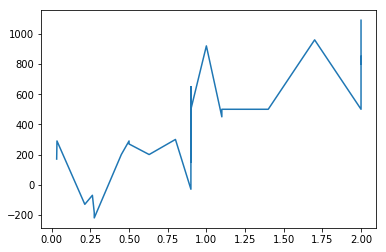

In [9]:
# Premier aperçu de la courbe
fig = plt.figure()
ax = plt.axes()
ax.plot(x,y);

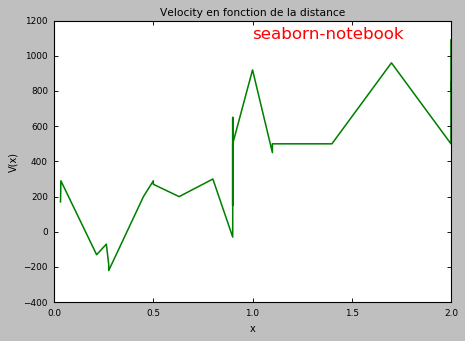

In [27]:
# Rendons la courbe plus tape à l'oeil

# Changer la taille de la police par défaut
plt.rcParams.update({'font.size' : 15})

fig = plt.figure()
ax = plt.axes()

plt.plot(x, y, color='g', linestyle='solid', label='Evoliton')

# Titre de notre graphe
plt.title("Velocity en fonction de la distance")

# Style de graphe
plt.style.use(plt.style.available[3])
plt.text(s=plt.style.available[3], x= 1, y=1100, color='red')

# Titres des axes
ax = ax.set(xlabel='x', ylabel='V(x)')

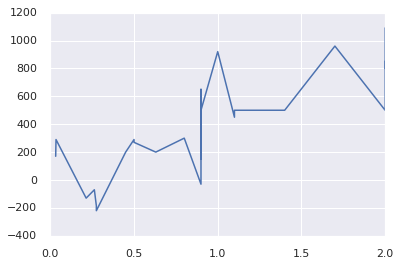

In [31]:
# Seaborn library
sns.set()
plt.plot(x,y);

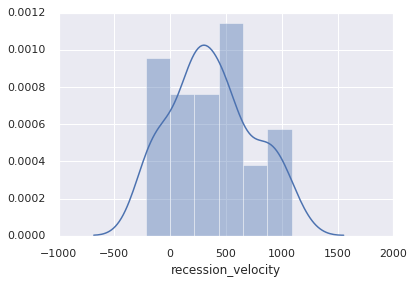

In [33]:
# Diagramme pour voir la moyenne
sns.distplot(y, kde=True);

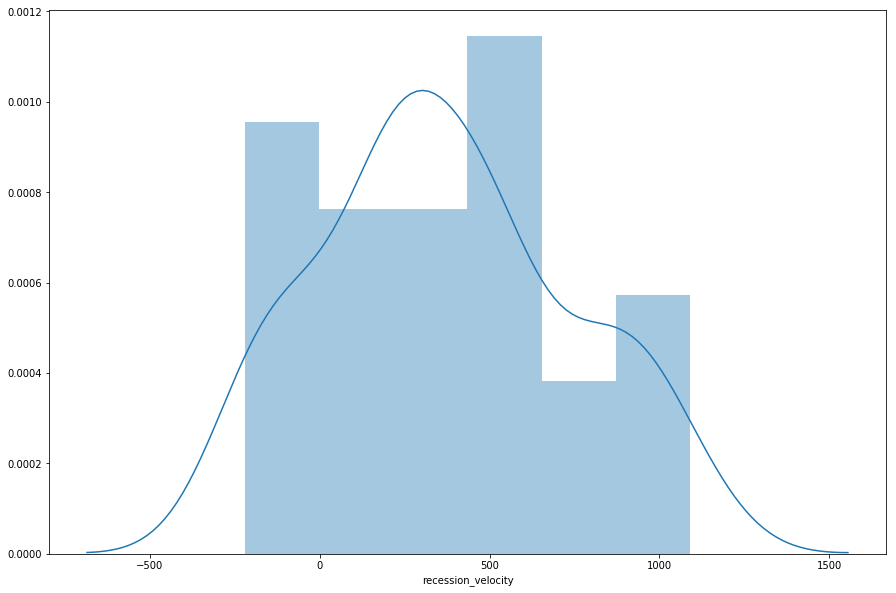

In [18]:
# Un autre moyen de voir la moyenne
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(hubble_data['recession_velocity'])
plt.show()

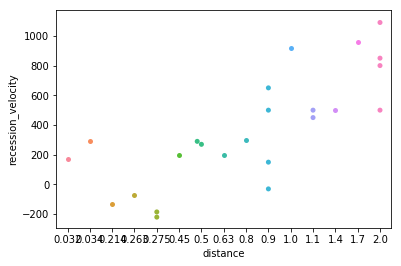

In [9]:
# Construction des points du tableau
sns.swarmplot(x="distance", y="recession_velocity", data=hubble_data)

# Show plot
plt.show()

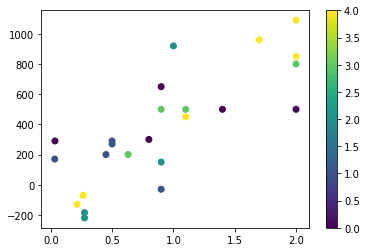

In [15]:
x = hubble_data["distance"]
y = hubble_data["recession_velocity"]
colors = np.random.randint(0,5, len(x))

plt.scatter(x,y, c=colors)

plt.colorbar()

plt.show()

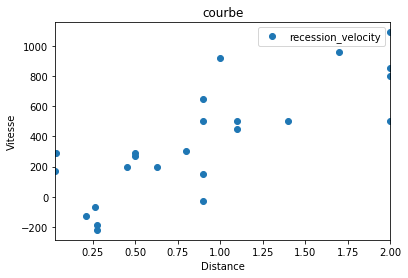

In [17]:
# un autre plot
hubble_data.plot(x='distance',y='recession_velocity', style='o')
plt.title('courbe')
plt.xlabel('Distance')
plt.ylabel('Vitesse')
plt.show()

In [29]:
"""Il y a deux manière de prédire:
    - la regression qui se base sur des sorties continues
    - la classification qui se base sur des valeurs discrètes
    
La regression linéaire sous-entend une droite dans un espace bi-dimensionnel.
Ce qui nous ramène à l'équation de droite : Y = a*x + b
où a : coefficient directeur
et b : l'ordonnée de l'origine de la droite"""

# Pour commencer à analyse nos données,
# capturons chacun de nos valeurs dans un tableau numpy : ndarray
x = hubble_data['distance'].values.reshape(-1,1) # où -1 défini la taille du tableau infini (pareil que ":")
y = hubble_data['recession_velocity'].values.reshape(-1,1)
# où X représente la distance et y la vitesse

In [26]:
# La prochaine étape est de diviser nos données en deux parties:
# avec 80% des data pour avoir notre courbe et 20% pour tester l'éfficacité de notre algorithme
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [27]:
# Entrainons maintenant notre algorithme
regresseur = LinearRegression()
regresseur.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
# Regardons les paramètres de notre courbe
print("L'ordonnée d'origine de notre courbe  'b' est : ", regresseur.intercept_)
print("Le coefficient directeur 'a' est : ", regresseur.coef_)

L'ordonnée d'origine de notre courbe  'b' est :  [-65.56368623]
Le coefficient directeur 'a' est :  [[532.35841277]]


In [30]:
# Pour vérifier l'éfficacité de notre programme,
# nous allons faire des predictions les 20% des data : x_test
y_pred = regresseur.predict(x_test)

In [31]:
# Comparons nos valeurs actuels de 'x_test' par rapport à celles prédites
df = pd.DataFrame({'Actuel': y_test.flatten(), 'Prédites': y_pred.flatten()})
df

,Actuel,Prédites
0,-30,413.558885
1,300,360.323044
2,800,999.153139
3,500,413.558885
4,500,999.153139


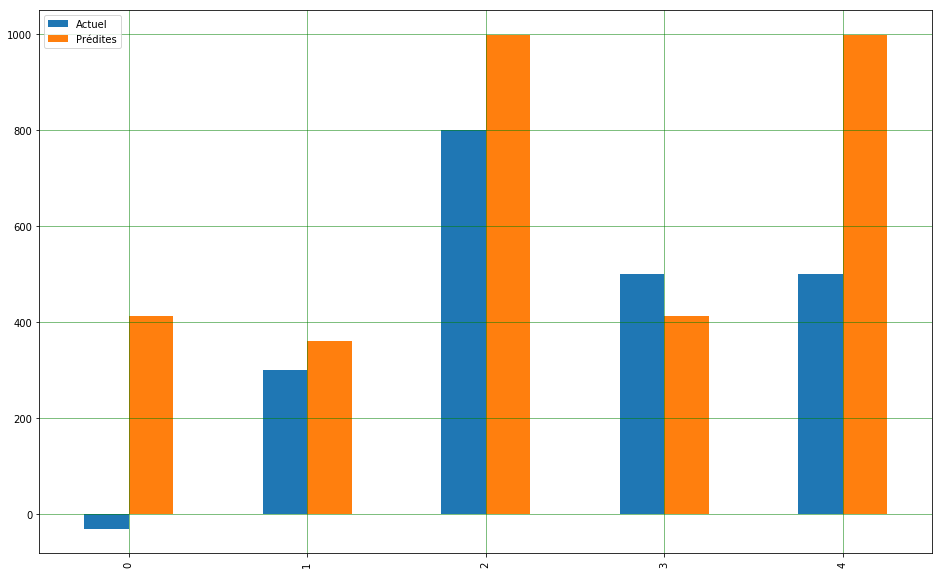

In [32]:
# On voit des écarts importantes dans la première et dernière ligne
# Vérifion cela dans une graphe de barre
df.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

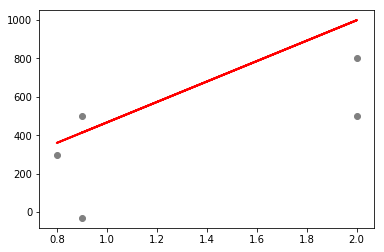

In [33]:
# Notre modèle n'est pas très précise avec ces écarts
# Visualison notre courbe par rapport au data test :x_test et y_test
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

In [34]:
# Moyenne d'écart
print('La moyenne d\'écart est ', metrics.mean_absolute_error(y_test, y_pred))

La moyenne d'écart est  257.7258645276969


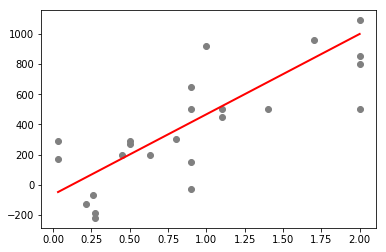

In [36]:
# La courbe avec tous nos data
y_predit_all = regresseur.predict(x)
plt.scatter(x, y, color='gray')
plt.plot(x, y_predit_all, color='red', linewidth=2)
plt.show()

In [37]:
# Moyenne d'écart
print('La moyenne d\'écart de la courbe finale est ', metrics.mean_absolute_error(y, y_predit_all))

La moyenne d'écart de la courbe finale est  190.51044767125936


# On voit des ecarts